In [1]:
from benchmark import Tracker

tracker = Tracker()

In [34]:
tracker.load_from_file('benchmarks/b-4-single.txt')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

plt.rcParams['figure.figsize'] = [20, 8]

In [5]:
def get_data(index):
    index -= 1
    info = tracker.clue_infos[index]
    neutral_div = sum(info.neutral_dist_avg) / float(tracker.word_counts[index])
    negative_div = sum(info.negative_dist_avg) / float(tracker.word_counts[index])
    return [(dist, 'red') for dist in info.clue_dists] + [(info.neutral_dist_max, 'yellow'),
            ([item / neutral_div for item in info.neutral_dist_avg], 'yellow'),
            (info.negative_dist_max, 'blue'),
            ([item / negative_div for item in info.negative_dist_avg], 'blue'),
            (info.assassin_dist, 'black')]

# Clue Size Distribution:

<BarContainer object of 9 artists>

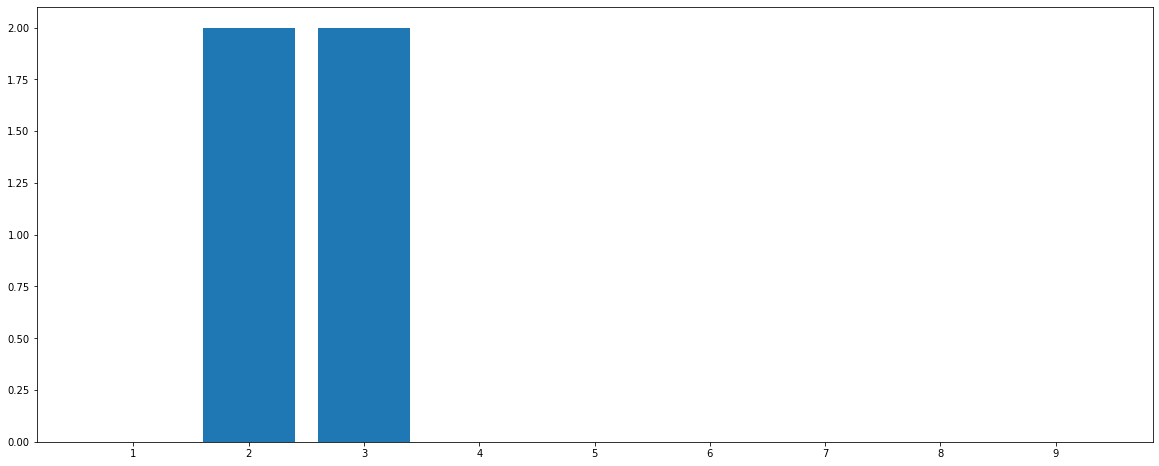

In [30]:
plt.bar([str(index+1) for index in range(9)], tracker.word_counts)

# Clue to Word Similarities

2 Clues, n=2


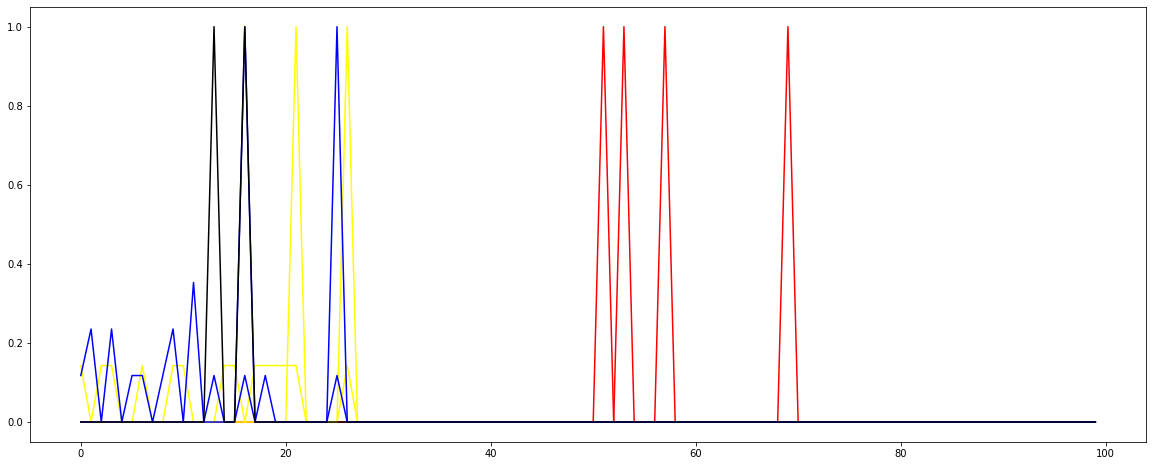

3 Clues, n=2


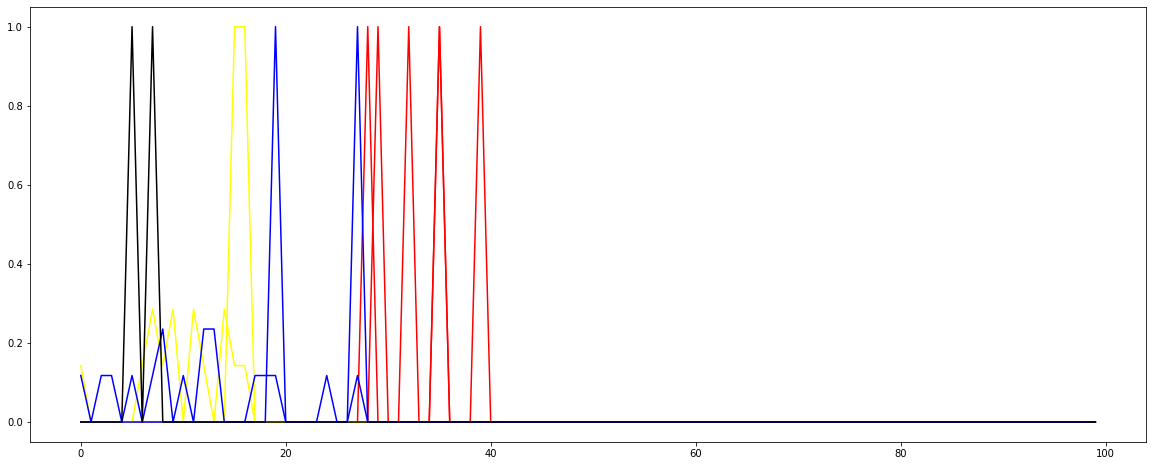

In [35]:
cluster_size = 1
clue_size_threshold = 1
for clue_count, n in [(i+1, size,) for i, size in enumerate(tracker.word_counts) if size >= clue_size_threshold]:
    old_data = get_data(clue_count)
    data = []
    for i, (item, color) in enumerate(old_data):
        item = [sum(item[i*cluster_size:(i+1)*cluster_size]) for i in range(int(100/cluster_size))]
        data.append((item, color,))
    largest_x = 0
    max_value = 0
    for item, color in data:
        if max(item) > max_value:
            max_value = max(item)
        for i, v in enumerate(item):
            if i > largest_x and v != 0:
                largest_x = i
    for item, color in data:
        plt.plot(item, color=color)
    print('{} Clue{}, n={}'.format(clue_count, 's' if clue_count > 1 else '', n))
    plt.show()